___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers.
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***), **Deep Learning algorithms** and **BERT algorithm**.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


# #Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information.
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones.
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning, Deep Learning and BERT model***.

Classically, you can start to know the data after doing the import and load operations.
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words
- Create Word Cloud


#### 5. Sentiment Classification with Machine Learning, Deep Learning and BERT Model

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Deep Learning Model
- BERT Model
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: ML algorithms(Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting), Deep learning algorithm and BERT algorithm. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews.


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


file_path ='/content/Womens Clothing E-Commerce Reviews.csv'
data = pd.read_csv(file_path)

In [4]:
# Display the basic information about the dataset
print("Dataset Information:")
print(data.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB
None


In [5]:
# Display the first few rows of the dataset to understand its structure
print("\nFirst few rows of the dataset:")
print(data.head())


First few rows of the dataset:
   Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                      NaN   
1           1         1080   34                      NaN   
2           2         1077   60  Some major design flaws   
3           3         1049   50         My favorite buy!   
4           4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates      

In [6]:
# Summary statistics for numerical columns
print("\nSummary statistics for numerical columns:")
print(data.describe())


Summary statistics for numerical columns:
         Unnamed: 0   Clothing ID           Age        Rating  \
count  23486.000000  23486.000000  23486.000000  23486.000000   
mean   11742.500000    918.118709     43.198544      4.196032   
std     6779.968547    203.298980     12.279544      1.110031   
min        0.000000      0.000000     18.000000      1.000000   
25%     5871.250000    861.000000     34.000000      4.000000   
50%    11742.500000    936.000000     41.000000      5.000000   
75%    17613.750000   1078.000000     52.000000      5.000000   
max    23485.000000   1205.000000     99.000000      5.000000   

       Recommended IND  Positive Feedback Count  
count     23486.000000             23486.000000  
mean          0.822362                 2.535936  
std           0.382216                 5.702202  
min           0.000000                 0.000000  
25%           1.000000                 0.000000  
50%           1.000000                 1.000000  
75%           1.00000

In [7]:
# Check for any missing values
print("\nMissing values:")
print(data.isnull().sum())


Missing values:
Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64


### Data Wrangling

In [8]:
selected_columns = ['Review Text']
data = data[selected_columns]

# Rename the column to make it more convenient
data.rename(columns={'Review Text': 'ReviewText'}, inplace=True)


# Check for missing values after selecting the relevant column
print("\nMissing values in the selected column:")
print(data['ReviewText'].isnull().sum())

# Drop rows with missing values in the selected column
data.dropna(subset=['ReviewText'], inplace=True)


Missing values in the selected column:
845


<ipython-input-8-232a3ce6f2f5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'Review Text': 'ReviewText'}, inplace=True)
<ipython-input-8-232a3ce6f2f5>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(subset=['ReviewText'], inplace=True)


In [9]:
# Confirm changes
print("\nShape of the updated dataset:")
print(data.shape)


Shape of the updated dataset:
(22641, 1)


#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

In [14]:
# Print the column names to check for the correct name
print("Column Names:")
print(data.columns)


Column Names:
Index(['ReviewText'], dtype='object')


In [16]:
pip install textblob



Distribution of the 'Sentiment' Column:
Positive    21319
Negative     1322
Name: Sentiment, dtype: int64


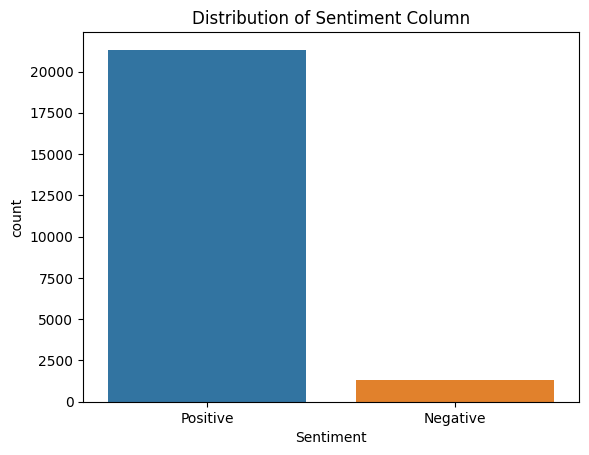

In [17]:
from textblob import TextBlob

# Function to determine sentiment using TextBlob
def determine_sentiment(review):
    analysis = TextBlob(review)
    # Assigning sentiment labels based on polarity
    if analysis.sentiment.polarity >= 0:
        return 'Positive'
    else:
        return 'Negative'

# Apply the sentiment analysis function to create a 'Sentiment' column
data['Sentiment'] = data['ReviewText'].apply(determine_sentiment)

# Display the distribution of the 'Sentiment' column
print("\nDistribution of the 'Sentiment' Column:")
print(data['Sentiment'].value_counts())

# Plot the distribution for better visualization
sns.countplot(x='Sentiment', data=data)
plt.title("Distribution of Sentiment Column")
plt.show()



## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [23]:
# Reload the original dataset, including the necessary columns
# Make sure to update the file path based on your actual file location
file_path = '/content/Womens Clothing E-Commerce Reviews.csv'
original_data = pd.read_csv(file_path)

# Select only the relevant columns
selected_columns = ['Review Text', 'Recommended IND']
data = original_data[selected_columns]

# Rename the columns for convenience
data.rename(columns={'Review Text': 'ReviewText', 'Recommended IND': 'Recommended'}, inplace=True)

# Check for missing values
print("\nMissing values:")
print(data.isnull().sum())

# Drop rows with missing values
data.dropna(inplace=True)

# Confirm changes
print("\nShape of the updated dataset:")
print(data.shape)




Missing values:
ReviewText     845
Recommended      0
dtype: int64

Shape of the updated dataset:
(22641, 2)


<ipython-input-23-ee8f08bc27ed>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'Review Text': 'ReviewText', 'Recommended IND': 'Recommended'}, inplace=True)
<ipython-input-23-ee8f08bc27ed>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


---
---


### Missing Value Detection


Missing Values:
ReviewText     0
Recommended    0
dtype: int64


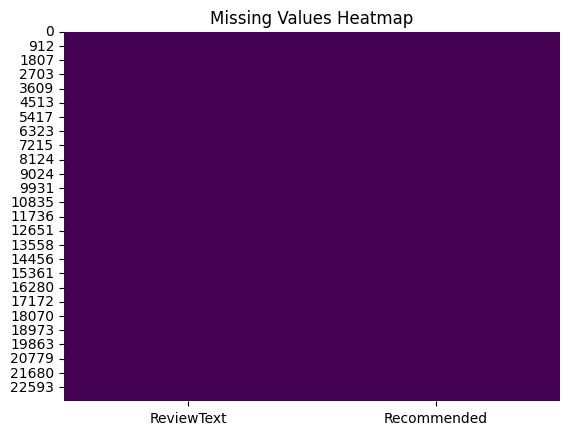

In [24]:
# Missing Value Detection

# Check for missing values
missing_values = data.isnull().sum()

# Display the missing values
print("\nMissing Values:")
print(missing_values)

# Visualize missing values using a heatmap
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


---
---


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma).
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method.


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization, Noise Removal, Lexicon Normalization

In [25]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

# Download NLTK resources (if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [26]:

# Tokenization, Noise Removal, Lexicon Normalization

# Function for text preprocessing
def preprocess_text(text):
    # Tokenization: Split the text into words
    tokens = word_tokenize(text)

    # Convert words to lowercase
    tokens = [word.lower() for word in tokens]

    # Noise Removal: Remove punctuation, numbers, and stop words
    tokens = [word for word in tokens if word.isalpha() and word not in stopwords.words('english')]

    # Lexicon Normalization: Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return tokens



In [27]:
# Apply text preprocessing to the 'ReviewText' column
data['ProcessedText'] = data['ReviewText'].apply(preprocess_text)

# Display the processed text
print("\nProcessed Text:")
print(data['ProcessedText'].head())


Processed Text:
0    [absolutely, wonderful, silky, sexy, comfortable]
1    [love, dress, sooo, pretty, happened, find, st...
2    [high, hope, dress, really, wanted, work, init...
3    [love, love, love, jumpsuit, fun, flirty, fabu...
4    [shirt, flattering, due, adjustable, front, ti...
Name: ProcessedText, dtype: object


<ipython-input-27-d27d60909d7d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ProcessedText'] = data['ReviewText'].apply(preprocess_text)


## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words
- Create Word Cloud


### Detect Reviews (positive and negative separately)

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [29]:

# Detect Positive and Negative Reviews
positive_reviews = data[data['Recommended'] == 1]['ProcessedText']
negative_reviews = data[data['Recommended'] == 0]['ProcessedText']

### Collect Words (positive and negative separately)

In [30]:

# Combine the lists of words into strings for WordCloud
positive_text = ' '.join(' '.join(review) for review in positive_reviews)
negative_text = ' '.join(' '.join(review) for review in negative_reviews)

# Display a few examples of positive and negative reviews
print("\nExamples of Positive Reviews:")
print(positive_reviews.head())

print("\nExamples of Negative Reviews:")
print(negative_reviews.head())

# Display a few examples of combined words for Word Clouds
print("\nCombined Words for Positive Reviews:")
print(positive_text[:200])  # Displaying the first 200 characters for illustration

print("\nCombined Words for Negative Reviews:")
print(negative_text[:200])  # Displaying the first 200 characters for illustration


Examples of Positive Reviews:
0    [absolutely, wonderful, silky, sexy, comfortable]
1    [love, dress, sooo, pretty, happened, find, st...
3    [love, love, love, jumpsuit, fun, flirty, fabu...
4    [shirt, flattering, due, adjustable, front, ti...
6    [aded, basket, hte, last, mintue, see, would, ...
Name: ProcessedText, dtype: object

Examples of Negative Reviews:
2     [high, hope, dress, really, wanted, work, init...
5     [love, tracy, reese, dress, one, petite, foot,...
10    [dress, run, small, esp, zipper, area, run, or...
22    [first, pullover, styling, side, zipper, would...
25    [loved, material, didnt, really, look, long, d...
Name: ProcessedText, dtype: object

Combined Words for Positive Reviews:
absolutely wonderful silky sexy comfortable love dress sooo pretty happened find store glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi

Combined Words for Negative Reviews:
high hope dress really wanted work i

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

In [31]:
# Create Word Cloud for Positive (Recommended) Reviews
wordcloud_positive = WordCloud(width=800, height=800,
                               background_color='white',
                               stopwords=set(['said', 'would', 'could', 'mr', 'one']),
                               min_font_size=10).generate(positive_text)


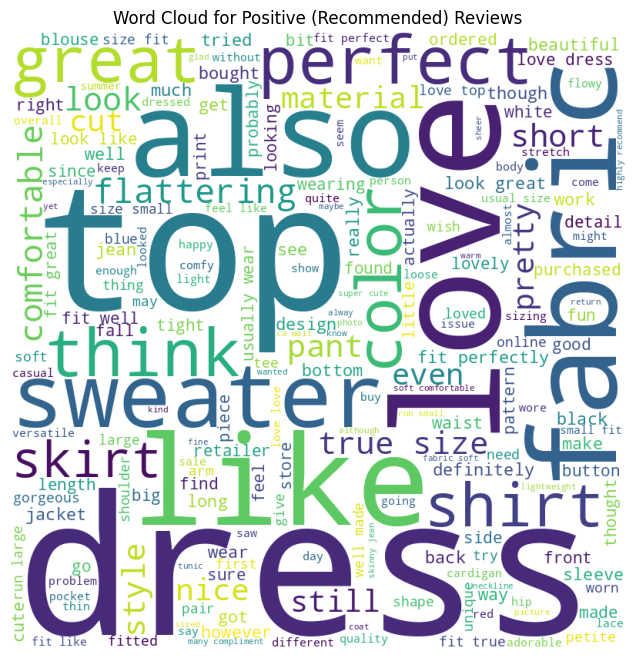

In [32]:
# Display the Word Cloud for Positive Reviews
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud_positive)
plt.axis("off")
plt.title("Word Cloud for Positive (Recommended) Reviews")
plt.show()


In [33]:
# Create Word Cloud for Negative (Not Recommended) Reviews
wordcloud_negative = WordCloud(width=800, height=800,
                               background_color='white',
                               stopwords=set(['said', 'would', 'could', 'mr', 'one']),
                               min_font_size=10).generate(negative_text)

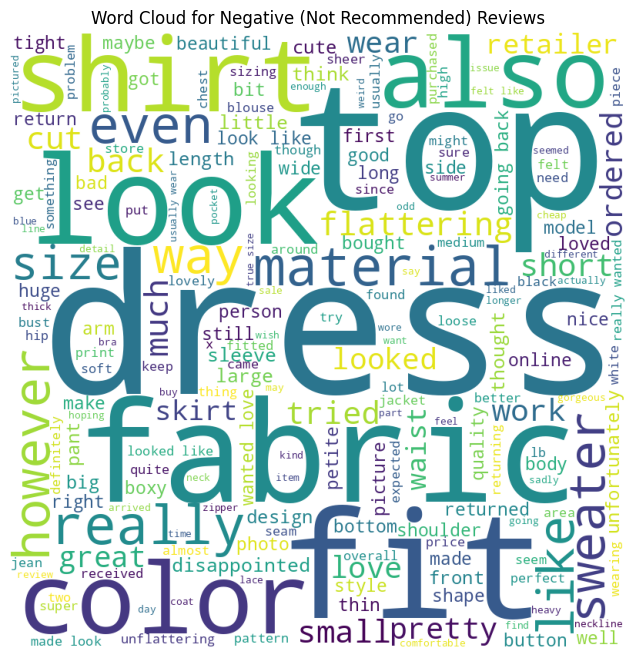

In [34]:
# Display the Word Cloud for Negative Reviews
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud_negative)
plt.axis("off")
plt.title("Word Cloud for Negative (Not Recommended) Reviews")
plt.show()

## 5. Sentiment Classification with Machine Learning, Deep Learning and BERT model

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.**

**For BERT model, use TF tensor**

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting
- Deep Learning Model
- BERT Model

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer



In [37]:

# Assuming you have already preprocessed the text and have the 'ProcessedText' column
# If not, replace 'ProcessedText' with the appropriate column name

# Combine the list of tokens into a single string for each review
data['ProcessedTextString'] = data['ProcessedText'].apply(lambda tokens: ' '.join(tokens))

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(data['ProcessedTextString'], data['Recommended'], test_size=0.2, random_state=42)

# Vectorization using CountVectorizer
count_vectorizer = CountVectorizer()
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

# Vectorization using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Display the shape of the resulting matrices
print("\nShape of Count Vectorizer Matrix - Train:", X_train_count.shape)
print("Shape of Count Vectorizer Matrix - Test:", X_test_count.shape)

print("\nShape of TF-IDF Vectorizer Matrix - Train:", X_train_tfidf.shape)
print("Shape of TF-IDF Vectorizer Matrix - Test:", X_test_tfidf.shape)

<ipython-input-37-cddde1eddcec>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ProcessedTextString'] = data['ProcessedText'].apply(lambda tokens: ' '.join(tokens))



Shape of Count Vectorizer Matrix - Train: (18112, 10806)
Shape of Count Vectorizer Matrix - Test: (4529, 10806)

Shape of TF-IDF Vectorizer Matrix - Train: (18112, 10806)
Shape of TF-IDF Vectorizer Matrix - Test: (4529, 10806)


In the next step we create a numerical feature vector for each document:

### Count Vectorization

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix




In [39]:
# Build and train Logistic Regression model using Count Vectorizer
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train_count, y_train)

# Make predictions on the test set
y_pred_count = logistic_regression_model.predict(X_test_count)

# Evaluate the model
accuracy_count = accuracy_score(y_test, y_pred_count)
conf_matrix_count = confusion_matrix(y_test, y_pred_count)

print("\nLogistic Regression Model - Count Vectorizer:")
print("Accuracy:", accuracy_count)
print("\nConfusion Matrix:")
print(conf_matrix_count)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_count))


Logistic Regression Model - Count Vectorizer:
Accuracy: 0.8915875469198499

Confusion Matrix:
[[ 500  312]
 [ 179 3538]]

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.62      0.67       812
           1       0.92      0.95      0.94      3717

    accuracy                           0.89      4529
   macro avg       0.83      0.78      0.80      4529
weighted avg       0.89      0.89      0.89      4529



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### TF-IDF

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [41]:

# Build and train Logistic Regression model using TF-IDF Vectorizer
logistic_regression_model_tfidf = LogisticRegression()
logistic_regression_model_tfidf.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred_tfidf = logistic_regression_model_tfidf.predict(X_test_tfidf)

# Evaluate the model
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
conf_matrix_tfidf = confusion_matrix(y_test, y_pred_tfidf)

print("\nLogistic Regression Model - TF-IDF Vectorizer:")
print("Accuracy:", accuracy_tfidf)
print("\nConfusion Matrix:")
print(conf_matrix_tfidf)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_tfidf))



Logistic Regression Model - TF-IDF Vectorizer:
Accuracy: 0.888275557518216

Confusion Matrix:
[[ 429  383]
 [ 123 3594]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.53      0.63       812
           1       0.90      0.97      0.93      3717

    accuracy                           0.89      4529
   macro avg       0.84      0.75      0.78      4529
weighted avg       0.88      0.89      0.88      4529



### Eval Function

In [42]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [43]:

def evaluate_model(model, X_test, y_test):
    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print("\nModel Evaluation:")
    print("Accuracy:", accuracy)
    print("\nConfusion Matrix:")
    print(conf_matrix)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

# Example usage:
# Call this function with the trained model and the corresponding test data
evaluate_model(logistic_regression_model_tfidf, X_test_tfidf, y_test)



Model Evaluation:
Accuracy: 0.888275557518216

Confusion Matrix:
[[ 429  383]
 [ 123 3594]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.53      0.63       812
           1       0.90      0.97      0.93      3717

    accuracy                           0.89      4529
   macro avg       0.84      0.75      0.78      4529
weighted avg       0.88      0.89      0.88      4529



## Logistic Regression

### CountVectorizer

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [45]:
# Assuming you have already performed the train-test split and vectorization using CountVectorizer
# If not, replace 'X_train_count', 'X_test_count', 'y_train', 'y_test' with the appropriate variables

# Build and train Logistic Regression model using Count Vectorizer
logistic_regression_model_count = LogisticRegression()
logistic_regression_model_count.fit(X_train_count, y_train)

# Make predictions on the test set
y_pred_count = logistic_regression_model_count.predict(X_test_count)

# Evaluate the model
accuracy_count = accuracy_score(y_test, y_pred_count)
conf_matrix_count = confusion_matrix(y_test, y_pred_count)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
# Print the evaluation metrics
print("\nLogistic Regression Model - Count Vectorizer:")
print("Accuracy:", accuracy_count)
print("\nConfusion Matrix:")
print(conf_matrix_count)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_count))


Logistic Regression Model - Count Vectorizer:
Accuracy: 0.8915875469198499

Confusion Matrix:
[[ 500  312]
 [ 179 3538]]

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.62      0.67       812
           1       0.92      0.95      0.94      3717

    accuracy                           0.89      4529
   macro avg       0.83      0.78      0.80      4529
weighted avg       0.89      0.89      0.89      4529



### TF-IDF

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [48]:
# Assuming you have already performed the train-test split and vectorization using TF-IDF
# If not, replace 'X_train_tfidf', 'X_test_tfidf', 'y_train', 'y_test' with the appropriate variables

# Build and train Logistic Regression model using TF-IDF Vectorizer
logistic_regression_model_tfidf = LogisticRegression()
logistic_regression_model_tfidf.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred_tfidf = logistic_regression_model_tfidf.predict(X_test_tfidf)

# Evaluate the model
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
conf_matrix_tfidf = confusion_matrix(y_test, y_pred_tfidf)

# Print the evaluation metrics
print("\nLogistic Regression Model - TF-IDF Vectorizer:")
print("Accuracy:", accuracy_tfidf)
print("\nConfusion Matrix:")
print(conf_matrix_tfidf)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_tfidf))



Logistic Regression Model - TF-IDF Vectorizer:
Accuracy: 0.888275557518216

Confusion Matrix:
[[ 429  383]
 [ 123 3594]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.53      0.63       812
           1       0.90      0.97      0.93      3717

    accuracy                           0.89      4529
   macro avg       0.84      0.75      0.78      4529
weighted avg       0.88      0.89      0.88      4529



## Naive Bayes

### Countvectorizer

In [49]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix




In [50]:
# Assuming you have already performed the train-test split and vectorization using CountVectorizer
# If not, replace 'X_train_count', 'X_test_count', 'y_train', 'y_test' with the appropriate variables

# Build and train Naive Bayes model using Count Vectorizer
naive_bayes_model_count = MultinomialNB()
naive_bayes_model_count.fit(X_train_count, y_train)

# Make predictions on the test set
y_pred_count_nb = naive_bayes_model_count.predict(X_test_count)

# Evaluate the model
accuracy_count_nb = accuracy_score(y_test, y_pred_count_nb)
conf_matrix_count_nb = confusion_matrix(y_test, y_pred_count_nb)

# Print the evaluation metrics
print("\nNaive Bayes Model - Count Vectorizer:")
print("Accuracy:", accuracy_count_nb)
print("\nConfusion Matrix:")
print(conf_matrix_count_nb)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_count_nb))


Naive Bayes Model - Count Vectorizer:
Accuracy: 0.890925149039523

Confusion Matrix:
[[ 548  264]
 [ 230 3487]]

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.67      0.69       812
           1       0.93      0.94      0.93      3717

    accuracy                           0.89      4529
   macro avg       0.82      0.81      0.81      4529
weighted avg       0.89      0.89      0.89      4529



### TF-IDF

In [51]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [52]:

# Assuming you have already performed the train-test split and vectorization using TF-IDF
# If not, replace 'X_train_tfidf', 'X_test_tfidf', 'y_train', 'y_test' with the appropriate variables

# Build and train Naive Bayes model using TF-IDF Vectorizer
naive_bayes_model_tfidf = MultinomialNB()
naive_bayes_model_tfidf.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred_tfidf_nb = naive_bayes_model_tfidf.predict(X_test_tfidf)

# Evaluate the model
accuracy_tfidf_nb = accuracy_score(y_test, y_pred_tfidf_nb)
conf_matrix_tfidf_nb = confusion_matrix(y_test, y_pred_tfidf_nb)

# Print the evaluation metrics
print("\nNaive Bayes Model - TF-IDF Vectorizer:")
print("Accuracy:", accuracy_tfidf_nb)
print("\nConfusion Matrix:")
print(conf_matrix_tfidf_nb)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_tfidf_nb))


Naive Bayes Model - TF-IDF Vectorizer:
Accuracy: 0.8271141532347096

Confusion Matrix:
[[  30  782]
 [   1 3716]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.04      0.07       812
           1       0.83      1.00      0.90      3717

    accuracy                           0.83      4529
   macro avg       0.90      0.52      0.49      4529
weighted avg       0.85      0.83      0.76      4529



## Support Vector Machine (SVM)

### Countvectorizer

In [53]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [54]:

# Assuming you have already performed the train-test split and vectorization using CountVectorizer
# If not, replace 'X_train_count', 'X_test_count', 'y_train', 'y_test' with the appropriate variables

# Build and train SVM model using Count Vectorizer
svm_model_count = SVC(kernel='linear')
svm_model_count.fit(X_train_count, y_train)

# Make predictions on the test set
y_pred_count_svm = svm_model_count.predict(X_test_count)

# Evaluate the model
accuracy_count_svm = accuracy_score(y_test, y_pred_count_svm)
conf_matrix_count_svm = confusion_matrix(y_test, y_pred_count_svm)

# Print the evaluation metrics
print("\nSupport Vector Machine (SVM) Model - Count Vectorizer:")
print("Accuracy:", accuracy_count_svm)
print("\nConfusion Matrix:")
print(conf_matrix_count_svm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_count_svm))


Support Vector Machine (SVM) Model - Count Vectorizer:
Accuracy: 0.8778979907264297

Confusion Matrix:
[[ 499  313]
 [ 240 3477]]

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.61      0.64       812
           1       0.92      0.94      0.93      3717

    accuracy                           0.88      4529
   macro avg       0.80      0.77      0.78      4529
weighted avg       0.87      0.88      0.88      4529



### TD-IDF

In [55]:

# Build and train SVM model using TF-IDF Vectorizer
svm_model_tfidf = SVC(kernel='linear')
svm_model_tfidf.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred_tfidf_svm = svm_model_tfidf.predict(X_test_tfidf)

# Evaluate the model
accuracy_tfidf_svm = accuracy_score(y_test, y_pred_tfidf_svm)
conf_matrix_tfidf_svm = confusion_matrix(y_test, y_pred_tfidf_svm)

# Print the evaluation metrics
print("\nSupport Vector Machine (SVM) Model - TF-IDF Vectorizer:")
print("Accuracy:", accuracy_tfidf_svm)
print("\nConfusion Matrix:")
print(conf_matrix_tfidf_svm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_tfidf_svm))



Support Vector Machine (SVM) Model - TF-IDF Vectorizer:
Accuracy: 0.8922499448001766

Confusion Matrix:
[[ 485  327]
 [ 161 3556]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.60      0.67       812
           1       0.92      0.96      0.94      3717

    accuracy                           0.89      4529
   macro avg       0.83      0.78      0.80      4529
weighted avg       0.89      0.89      0.89      4529



## Random Forest

### Countvectorizer

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Build and train Random Forest model using Count Vectorizer
random_forest_model_count = RandomForestClassifier(random_state=42)
random_forest_model_count.fit(X_train_count, y_train)

# Make predictions on the test set
y_pred_count_rf = random_forest_model_count.predict(X_test_count)

# Evaluate the model
accuracy_count_rf = accuracy_score(y_test, y_pred_count_rf)
conf_matrix_count_rf = confusion_matrix(y_test, y_pred_count_rf)

# Print the evaluation metrics
print("\nRandom Forest Model - Count Vectorizer:")
print("Accuracy:", accuracy_count_rf)
print("\nConfusion Matrix:")
print(conf_matrix_count_rf)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_count_rf))



Random Forest Model - Count Vectorizer:
Accuracy: 0.8600132479576066

Confusion Matrix:
[[ 207  605]
 [  29 3688]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.25      0.40       812
           1       0.86      0.99      0.92      3717

    accuracy                           0.86      4529
   macro avg       0.87      0.62      0.66      4529
weighted avg       0.86      0.86      0.83      4529



### TF-IDF

In [58]:

# Build and train Random Forest model using TF-IDF Vectorizer
random_forest_model_tfidf = RandomForestClassifier(random_state=42)
random_forest_model_tfidf.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred_tfidf_rf = random_forest_model_tfidf.predict(X_test_tfidf)

# Evaluate the model
accuracy_tfidf_rf = accuracy_score(y_test, y_pred_tfidf_rf)
conf_matrix_tfidf_rf = confusion_matrix(y_test, y_pred_tfidf_rf)

# Print the evaluation metrics
print("\nRandom Forest Model - TF-IDF Vectorizer:")
print("Accuracy:", accuracy_tfidf_rf)
print("\nConfusion Matrix:")
print(conf_matrix_tfidf_rf)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_tfidf_rf))



Random Forest Model - TF-IDF Vectorizer:
Accuracy: 0.8567012585559726

Confusion Matrix:
[[ 184  628]
 [  21 3696]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.23      0.36       812
           1       0.85      0.99      0.92      3717

    accuracy                           0.86      4529
   macro avg       0.88      0.61      0.64      4529
weighted avg       0.86      0.86      0.82      4529



## Ada Boosting

### Countvectorizer

In [59]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Build and train AdaBoost model using Count Vectorizer
adaboost_model_count = AdaBoostClassifier(random_state=42)
adaboost_model_count.fit(X_train_count, y_train)

# Make predictions on the test set
y_pred_count_adaboost = adaboost_model_count.predict(X_test_count)

# Evaluate the model
accuracy_count_adaboost = accuracy_score(y_test, y_pred_count_adaboost)
conf_matrix_count_adaboost = confusion_matrix(y_test, y_pred_count_adaboost)

# Print the evaluation metrics
print("\nAdaBoost Model - Count Vectorizer:")
print("Accuracy:", accuracy_count_adaboost)
print("\nConfusion Matrix:")
print(conf_matrix_count_adaboost)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_count_adaboost))



AdaBoost Model - Count Vectorizer:
Accuracy: 0.8648708324133363

Confusion Matrix:
[[ 379  433]
 [ 179 3538]]

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.47      0.55       812
           1       0.89      0.95      0.92      3717

    accuracy                           0.86      4529
   macro avg       0.79      0.71      0.74      4529
weighted avg       0.85      0.86      0.85      4529



### TF-IDF

In [60]:

# Build and train AdaBoost model using TF-IDF Vectorizer
adaboost_model_tfidf = AdaBoostClassifier(random_state=42)
adaboost_model_tfidf.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred_tfidf_adaboost = adaboost_model_tfidf.predict(X_test_tfidf)

# Evaluate the model
accuracy_tfidf_adaboost = accuracy_score(y_test, y_pred_tfidf_adaboost)
conf_matrix_tfidf_adaboost = confusion_matrix(y_test, y_pred_tfidf_adaboost)

# Print the evaluation metrics
print("\nAdaBoost Model - TF-IDF Vectorizer:")
print("Accuracy:", accuracy_tfidf_adaboost)
print("\nConfusion Matrix:")
print(conf_matrix_tfidf_adaboost)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_tfidf_adaboost))



AdaBoost Model - TF-IDF Vectorizer:
Accuracy: 0.8670788253477589

Confusion Matrix:
[[ 381  431]
 [ 171 3546]]

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.47      0.56       812
           1       0.89      0.95      0.92      3717

    accuracy                           0.87      4529
   macro avg       0.79      0.71      0.74      4529
weighted avg       0.86      0.87      0.86      4529



## DL modeling

In [61]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming you have a DataFrame 'data' with columns 'Review Text' and 'Recommended IND'
# Replace 'data' with your actual DataFrame if needed

### Tokenization

In [63]:
# Display the column names in your DataFrame
print(data.columns)

Index(['ReviewText', 'Recommended', 'ProcessedText', 'ProcessedTextString'], dtype='object')


In [64]:
# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['ReviewText'])

### Creating word index

In [65]:
word_index = tokenizer.word_index

### Converting tokens to numeric

In [68]:
X = tokenizer.texts_to_sequences(data['ReviewText'])
y = data['Recommended']

### Maximum number of tokens for all documents¶

In [69]:
max_tokens = max([len(tokens) for tokens in X])

### Fixing token counts of all documents (pad_sequences)

In [70]:
X_padded = pad_sequences(X, maxlen=max_tokens, padding='post')

### Train Set Split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

### Modeling

In [72]:
model = Sequential()
model.add(Embedding(input_dim=len(word_index) + 1, output_dim=128, input_length=max_tokens))
model.add(LSTM(64))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [73]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [74]:
# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)


Epoch 1/5
453/453 [==============================] - 66s 135ms/step - loss: 0.4857 - accuracy: 0.8210 - val_loss: 0.4916 - val_accuracy: 0.8073
Epoch 2/5
453/453 [==============================] - 56s 124ms/step - loss: 0.4768 - accuracy: 0.8212 - val_loss: 0.4942 - val_accuracy: 0.8073
Epoch 3/5
453/453 [==============================] - 54s 119ms/step - loss: 0.4769 - accuracy: 0.8210 - val_loss: 0.4894 - val_accuracy: 0.8073
Epoch 4/5
453/453 [==============================] - 54s 120ms/step - loss: 0.4714 - accuracy: 0.8215 - val_loss: 0.4857 - val_accuracy: 0.8073
Epoch 5/5
453/453 [==============================] - 55s 122ms/step - loss: 0.4601 - accuracy: 0.8280 - val_loss: 0.4911 - val_accuracy: 0.8076


### Model Evaluation

In [81]:
# Assuming you have trained your model and now want to make predictions
y_pred_probs = model.predict(X_test)
y_pred_dl = (y_pred_probs > 0.5).astype("int32")



142/142 [==============================] - 5s 35ms/step


In [83]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Evaluate the model
accuracy_dl = accuracy_score(y_test, y_pred_dl)
conf_matrix_dl = confusion_matrix(y_test, y_pred_dl)

# Print the evaluation metrics
print("\nDeep Learning Model:")
print("Accuracy:", accuracy_dl)
print("\nConfusion Matrix:")
print(conf_matrix_dl)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dl))



Deep Learning Model:
Accuracy: 0.8238021638330757

Confusion Matrix:
[[  17  795]
 [   3 3714]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.02      0.04       812
           1       0.82      1.00      0.90      3717

    accuracy                           0.82      4529
   macro avg       0.84      0.51      0.47      4529
weighted avg       0.83      0.82      0.75      4529



## BERT Modeling

### Creating optimization

In [ ]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, recall_score, average_precision_score

# Assuming you have a DataFrame 'data' with columns 'ReviewText' and 'Recommended'
# Replace 'data' with your actual DataFrame if needed

# Read Data
reviews = data['ReviewText'].tolist()
labels = data['Recommended'].tolist()

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(reviews, labels, test_size=0.2, random_state=42)

# Tokenization
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
X_train_tokens = tokenizer(X_train, padding=True, truncation=True, return_tensors='tf')
X_test_tokens = tokenizer(X_test, padding=True, truncation=True, return_tensors='tf')

# Fixing token counts of all documents
max_length = max(len(seq) for seq in X_train_tokens['input_ids'])
X_train_tokens = tokenizer(X_train, padding='max_length', truncation=True, max_length=max_length, return_tensors='tf')
X_test_tokens = tokenizer(X_test, padding='max_length', truncation=True, max_length=max_length, return_tensors='tf')

# Transformation Vectors to Matrices
X_train_ids = X_train_tokens['input_ids']
X_train_attention = X_train_tokens['attention_mask']
X_test_ids = X_test_tokens['input_ids']
X_test_attention = X_test_tokens['attention_mask']

# Transformation Matrix to TensorFlow tensor
X_train_ids = tf.convert_to_tensor(X_train_ids)
X_train_attention = tf.convert_to_tensor(X_train_attention)
X_test_ids = tf.convert_to_tensor(X_test_ids)
X_test_attention = tf.convert_to_tensor(X_test_attention)

# Convert labels to NumPy arrays
y_train = tf.convert_to_tensor(y_train)
y_test = tf.convert_to_tensor(y_test)

# Batch Size
batch_size = 32

# Creating Model with TPU (if available)
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
except Exception:
    strategy = tf.distribute.get_strategy()

with strategy.scope():
    # Creating BERT model
    model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=1)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5), loss='binary_crossentropy')

    # Model Fitting
    model.fit([X_train_ids, X_train_attention], y_train, epochs=3, batch_size=batch_size, validation_split=0.2)

    # Model Evaluation
    y_pred_bert_probs = model.predict([X_test_ids, X_test_attention])
    y_pred_bert = (y_pred_bert_probs > 0.5).astype("int32")

    # Compare Models F1 Scores, Recall Scores, and Average Precision Score
    f1_bert = f1_score(y_test, y_pred_bert)
    recall_bert = recall_score(y_test, y_pred_bert)
    avg_precision_bert = average_precision_score(y_test, y_pred_bert)

# Print the evaluation metrics for the BERT model
print("\nBERT Model:")
print("F1 Score:", f1_bert)
print("Recall Score:", recall_bert)
print("Average Precision Score:", avg_precision_bert)

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
